0 32769
1 47282.2
2 55609.9
3 60473.0
4 63395.7
5 65231.1
6 66457.9


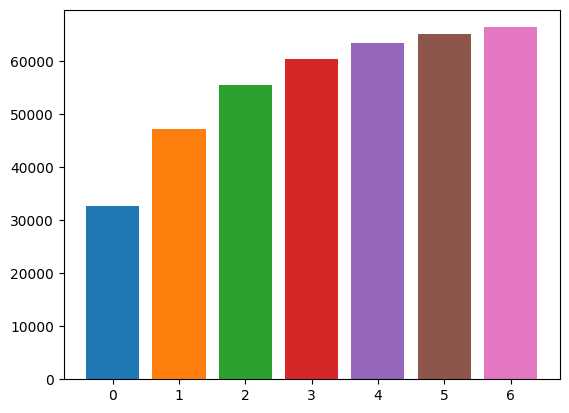

In [6]:
import matplotlib.pyplot as plt

filters =  [32769,47282.2,55609.9,60473.0,63395.7,65231.1,66457.9]

for x, f in enumerate(filters):
    print(x, f)
    plt.bar(x, f)


plt.show()

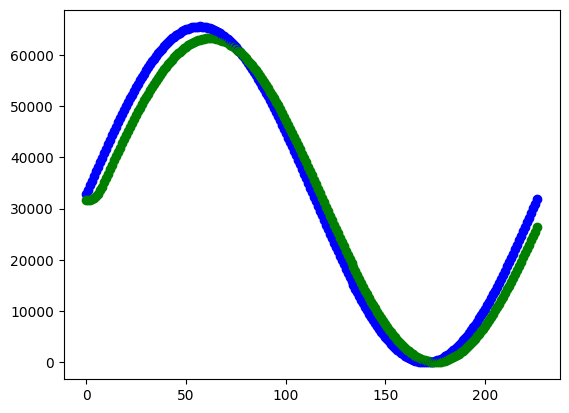

In [52]:
from math import trunc, sin, pi
import matplotlib.pyplot as plt
from array import array
from lib.dsp.fir_lpf import FirLpf

PI2 = pi * 2

sample_rate = 100100
pitch = 440
length = int(sample_rate / pitch)
sine = array("H", [0] * length)
for i in range(length):
    sine[i] = int(sin(PI2 * i / length) * ((2**15) - 1) + 2**15)

max_flt = 0
flt = FirLpf(12, sample_rate, 128, 16)
for x, y in enumerate(sine):
    filtered = flt.filter(y)
    plt.plot(x, y, 'bo')
    plt.plot(x, filtered, 'go')

plt.show()

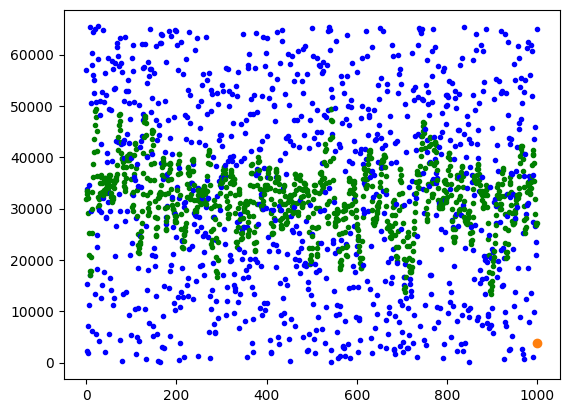

In [79]:
# FirLpf benchmark

from array import array
from random import randint
from time import time, time_ns
import matplotlib.pyplot as plt
from lib.dsp.fir_lpf import FirLpf

sample_rate = 44100

noise = array('H', [randint(0, 2 ** 16) for _ in range(1000)])

flt = FirLpf(12, sample_rate, 128, 16)

filtered = array('H', [0] * len(noise))

bench_per_sample = [0] * len(filtered)
for i, v in enumerate(noise):
    start = time_ns()
    filtered[i] = flt.filter(v)
    bench_per_sample[i] = time_ns() - start

for x, y in enumerate(noise):
    # plt.plot(x, bench_per_sample[x], 'r.')
    plt.plot(x, y, 'b.')
    plt.plot(x, filtered[x], 'g.')

avg_sample_bench = sum(bench_per_sample) / len(bench_per_sample)
plt.plot(0, avg_sample_bench, len(noise), avg_sample_bench, 'o')

plt.show()